The following example shows how to log data for training. The log data will be saved into data/training folder

In [1]:
# %matplotlib tk
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import common_utils.file_manager
import manager
import drone.trajectory
import drone.disturbance_model

plt.rcParams['figure.figsize'] = [15, 9]

wall_distance = 0.5
wind_speed_x = -12.0
wind_speed_y = 0.0
wind_speed_z = -12.0

is_figure8 = True

sim_test = manager.Manager()
if is_figure8:    
    model = drone.disturbance_model.WindEffectNearWall(wall_origin=np.array([-wall_distance, 0, 0]), 
                                                        u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
    trajectory = drone.trajectory.Figure8(10)
else:
    model = drone.disturbance_model.AggregatedDisturbance(wall_origin=np.array([-wall_distance, 0, 0]), 
                                                        u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
    trajectory= drone.trajectory.CircleYZ()
sim_test.set_up(disturbance_model=model, trajectory=trajectory)

if is_figure8: 
    sim_test.run(12.0) 
else:
    sim_test.run(32.0)

[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_with_trail_refine.yaml
is_sinusoidal_wind:  False
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
phi net input output fields:
input {'position': [0, 1, 2], 'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'sensed_omega': [0, 1, 2], 'f_ctrl_input': [2], 'torque_ctrl_input': [0, 1, 2], 'rotor_0_rotation_spd': None, 'rotor_1_rotation_spd': None, 'rotor_2_rotation_spd': None, 'rotor_3_rotation_spd': None}
label {'f_disturb_sensed_raw': [0, 1, 2]}
simple net input output fields:
input {'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'sensed_omeg

Trajectory

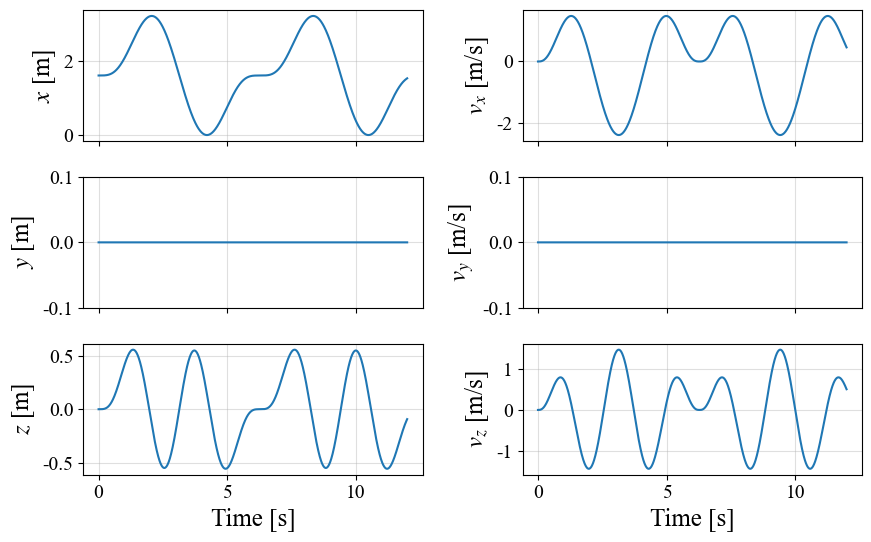

In [2]:
import matplotlib.pyplot as plt

def plot_trajectory(t_span, logger: np.ndarray, is_figure8):
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(9, 6))
    # fig.suptitle('Reference Trajectory Profile')

    # Position
    axs[0, 0].plot(t_span, logger["x_d"][:, 0])
    axs[0, 0].set_ylabel(r'$x$ [m]')
    axs[0, 0].grid(True, alpha=0.4)

    axs[1, 0].plot(t_span, logger["x_d"][:, 1])
    axs[1, 0].set_ylabel(r'$y$ [m]')
    if is_figure8:
        axs[1, 0].set_ylim(-0.1, 0.1)
    axs[1, 0].grid(True, alpha=0.4)

    axs[2, 0].plot(t_span, logger["x_d"][:, 2])
    axs[2, 0].set_ylabel(r'$z$ [m]')
    axs[2, 0].grid(True, alpha=0.4)
    axs[2, 0].set_xlabel('Time [s]')

    # Velocity
    axs[0, 1].plot(t_span, logger["v_d"][:, 0])
    axs[0, 1].set_ylabel(r'$v_{x}$ [m/s]')
    axs[0, 1].grid(True, alpha=0.4)

    axs[1, 1].plot(t_span, logger["v_d"][:, 1])
    axs[1, 1].set_ylabel(r'$v_{y}$ [m/s]')
    if is_figure8:
        axs[1, 1].set_ylim(-0.1, 0.1)
    axs[1, 1].grid(True, alpha=0.4)

    axs[2, 1].plot(t_span, logger["v_d"][:, 2])
    axs[2, 1].set_ylabel(r'$v_{z}$ [m/s]')
    axs[2, 1].grid(True, alpha=0.4)
    axs[2, 1].set_xlabel('Time [s]')

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    return fig

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,

    # ---- UNIVERSAL FONT SIZES ----
    "font.size": 16,         # baseline text
    "axes.labelsize": 18,    # axis labels
    "axes.titlesize": 13,    # subplot/figure titles
    "xtick.labelsize": 14,   # x tick labels
    "ytick.labelsize": 14,   # y tick labels
    "legend.fontsize": 14,   # legends
})

fig = plot_trajectory(sim_test.result.t_span, sim_test.logger.output, is_figure8)
if is_figure8:
    filename = f"traj0.pdf"
else:
    filename = f"traj1.pdf"
output_path = common_utils.file_manager.find_path_to_folder(["paper_results", filename])
fig.savefig(output_path, dpi=300, bbox_inches='tight')




x-z plane projection of the tracking result of figure 8

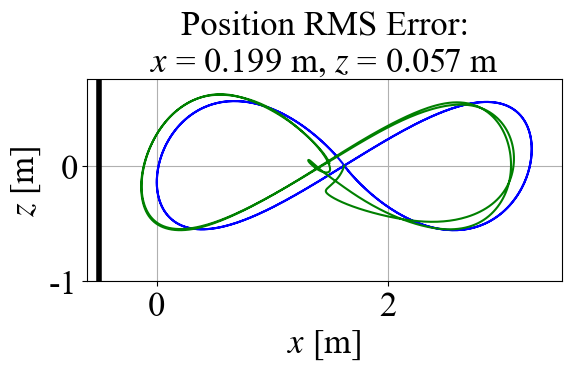

In [3]:
import matplotlib.pyplot as plt

def plot_2d_xz_trace(logger: np.ndarray, wall_x: float = 0.0):
    # Set publication-quality font settings
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "stix"
    rms_x = np.sqrt(np.mean(np.square(logger["e_x"][:, 0])))
    # rms_y = np.sqrt(np.mean(np.square(logger["e_x"][:, 1])))
    rms_z = np.sqrt(np.mean(np.square(logger["e_x"][:, 2])))


    fig, ax = plt.subplots(figsize=(6, 4))  # Width x Height in inches

    # Desired trajectory in x-z plane
    ax.plot(logger["x_d"][:, 0],
            -logger["x_d"][:, 2], 'b-', label='Desired Trajectory')

    # Actual drone trace in x-z plane
    ax.plot(logger["position"][:, 0],
            -logger["position"][:, 2], 'g-', label='Drone Trace')

    # Vertical black line to represent wall
    ax.axvline(x=wall_x, color='k', linestyle='-', linewidth=4.0, label='Wall Surface')

    # LaTeX-style title including wind vector
    title_1 = rf"Position RMS Error:"
    title_2 = rf"$x$ = {rms_x:.3f} m, $z$ = {rms_z:.3f} m"
    ax.set_title(title_1 + "\n" + title_2, fontsize=25)

    ax.set_xlabel(r"$x$ [m]", fontsize=25)
    ax.set_ylabel(r"$z$ [m]", fontsize=25)
    plt.tick_params(labelsize=25)  # Applies to current figure or axes

    # ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-0.6, 3.5)
    ax.set_ylim(-1, 0.75)

    plt.tight_layout()
    plt.show()
    return fig

def plot_2d_xz_yz_trace(logger: np.ndarray, wall_x: float = 0.0, is_figure8=True):

    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "stix"

    rms_x = np.sqrt(np.mean(logger["e_x"][:, 0]**2))
    rms_y = np.sqrt(np.mean(logger["e_x"][:, 1]**2))
    rms_z = np.sqrt(np.mean(logger["e_x"][:, 2]**2))
    rms_normal_force = np.sqrt(np.mean(logger["f_contact_normal"][:, 2]**2 + logger["f_contact_normal"][:, 1]**2 + logger["f_contact_normal"][:, 0]**2))
    print(f"RMS normal contact force: {rms_normal_force:.3f} N")

    fig = plt.figure(figsize=(10, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[1.0, 1.0])

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)

    ax0.plot(logger["x_d"][:, 0], -logger["x_d"][:, 2], 'b-')
    ax0.plot(logger["position"][:, 0], -logger["position"][:, 2], 'g-')
    ax0.axvline(x=wall_x, color='k', linewidth=4.0)
    ax0.set_xlabel(r"$x$ [m]", fontsize=22)
    ax0.set_ylabel(r"$z$ [m]", fontsize=22)
    ax0.grid(True)

    ax1.plot(logger["x_d"][:, 1], -logger["x_d"][:, 2], 'b-')
    ax1.plot(logger["position"][:, 1], -logger["position"][:, 2], 'g-')
    # ax1.plot(logger["tip_position"][:, 1], -logger["tip_position"][:, 2], 'r-') # heat map color vary with logger["f_contact_normal"] magnitude
    ax1.set_xlabel(r"$y$ [m]", fontsize=22)
    # ax1.set_ylabel(r"$z$ [m]", fontsize=22)
    ax1.grid(True)


    if True:
        from matplotlib.collections import LineCollection
        from matplotlib.colors import Normalize
        import matplotlib.cm as cm
        # --- tip trace with color varying by contact force ---
        tip_y = logger["tip_position"][:, 1]
        tip_z = -logger["tip_position"][:, 2]  # keep same sign convention as above

        # force "magnitude" – if logger["f_contact_normal"] is scalar normal force,
        # this will just be abs(normal); if it's a vector, this becomes the norm.
        f_normal = logger["f_contact_normal"]
        if f_normal.ndim == 1:
            f_mag = np.abs(f_normal)
        else:
            f_mag = np.linalg.norm(f_normal, axis=1)

        # build line segments for LineCollection: shape (N-1, 2, 2)
        points = np.column_stack((tip_y, tip_z)).reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # colormap + normalization
        norm = Normalize(vmin=np.min(f_mag), vmax=np.max(f_mag))
        lc = LineCollection(segments,
                            cmap=cm.Reds,   # choose any colormap you like
                            norm=norm)
        lc.set_array(f_mag)
        lc.set_linewidth(2.0)
        ax1.add_collection(lc)

        # # optional colorbar for contact force
        # cbar = fig.colorbar(lc, ax=ax1)
        # cbar.set_label(r"Normal Contact Force [N]", fontsize=18)
        # lc.set_clim(0.0, 1.0)   # ensure colorbar ticks match the fixed range

    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_label_position('left')
    ax1.tick_params(labelright=False)

    ax0.set_ylim(-0.4, 1.0)
    ax1.set_ylim(-0.4, 1.0)

 
    for ax in [ ax0, ax1]:
        ax.set_aspect('equal', adjustable='datalim')
        ax.tick_params(labelsize=18)
    ax0.set_xlim(left=-0.6, right=0.2)
    ax1.set_xlim(left=-0.6, right=0.6)
    plt.setp([ ax0, ax1], anchor='C')

    if is_figure8:
        title_1 = rf"Position RMS Error: "
        title_2 = rf"$x$ = {rms_x:.3f} m, $y$ = {rms_y:.3f} m, $z$ = {rms_z:.3f} m"
        fig.suptitle(title_1 + "\n" + title_2, fontsize=25)
    else:
        title_1 = rf"Position RMS Error: "
        title_2 = rf"x ({rms_x:.3f} m),  y ({rms_y:.3f} m),  z ({rms_z:.3f} m)"

        title_3 = rf"RMS Normal Contact Force: {rms_normal_force:.3f} N"
        title_3 = rf"RMS normal contact force ({rms_normal_force:.3f} N)"

        # fig.suptitle(title_1 + title_2 + "\n" + title_3, fontsize=20)
        fig.suptitle(title_1 + title_2 + "\n" + title_3,
                fontsize=18,
                x=0.1,            # left alignment
                ha='left')        # horizontal alignment


    fig.subplots_adjust(top=0.85)
    
    fig_cb = plt.figure(figsize=(0.25, 6.0))   # narrow + tall
    ax_cb = fig_cb.add_axes([0.3, 0.05, 0.25, 0.9])  # manual layout: [left, bottom, width, height]
    cbar = fig_cb.colorbar(lc, cax=ax_cb)
    cbar.set_label("Normal Contact Force [N]", fontsize=12)
    lc.set_clim(0.0, 1.0)

    plt.show()
    return fig, fig_cb


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
# Usage

if is_figure8:
    fig = plot_2d_xz_trace(sim_test.logger.output, -0.5)
    # filename = f"ml_est_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_free.pdf"
    filename = f"ml_est_no_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_free.pdf"
    # filename = f"no_est_no_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_free.pdf"
    output_path = common_utils.file_manager.find_path_to_folder(["paper_results", filename])
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
else:
    fig, fig_cb = plot_2d_xz_yz_trace(sim_test.logger.output, -0.5, True)
    filename = f"ml_est_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_endeffector.pdf"
    # filename = f"ml_est_no_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_endeffector.pdf"
    # filename = f"no_est_no_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_endeffector.pdf"
    output_path = common_utils.file_manager.find_path_to_folder(["paper_results", filename])
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
    output_path = common_utils.file_manager.find_path_to_folder(["paper_results", "colorbar.pdf"])
    fig_cb.savefig(output_path, dpi=300, bbox_inches='tight')

Generate the legends separately. 

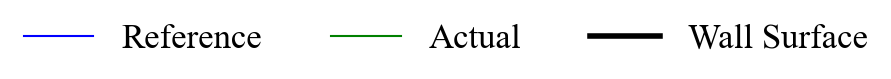

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1, 0.5))
ax.plot([], [], 'b-', label='Reference')
ax.plot([], [], 'g-', label='Actual')
ax.plot([], [], 'k-', label='Wall Surface',  linewidth=4.0)
ax.axis('off')
ax.legend(loc='center', ncol=3, frameon=False, fontsize=25)
output_path = common_utils.file_manager.find_path_to_folder(["paper_results", "legend.pdf"])
fig.savefig(output_path, bbox_inches='tight', dpi=300)